In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn import preprocessing
from seaborn import pairplot

In [2]:
best_bar = pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [12]:
bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]

# сортируем, убираем лишнее (группы по странам, где мало информации, неправильное нарзвание этих стран)
groupedAndSorted = bar.groupby('bean_orig')
bar = groupedAndSorted.filter(lambda x: len(x) > 3)
bar = bar[bar.bean_orig != '\xa0']
# bar.head()

print(bar)

      company_loc  rate percent           bean_orig
0          France  3.75     63%            Sao Tome
4          France  3.50     70%                Peru
5          France  2.75     70%           Venezuela
6          France  3.50     70%                Cuba
7          France  3.50     70%           Venezuela
8          France  3.75     70%           Venezuela
9          France  4.00     70%                Peru
10         France  2.75     70%              Panama
11         France  3.00     70%          Madagascar
12         France  3.25     70%              Brazil
13         France  3.75     70%             Ecuador
14         France  2.75     70%            Colombia
16         France  3.25     70%    Papua New Guinea
17         France  4.00     70%           Venezuela
18         France  3.25     70%                Peru
19         France  3.50     70%                Peru
20         France  4.00     63%                Peru
21         France  3.50     70%             Bolivia
22         F

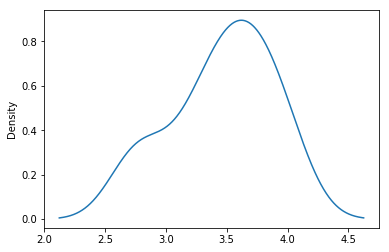

In [4]:
bar.iloc[:20].rate.plot.kde()

pandas.core.series.Series

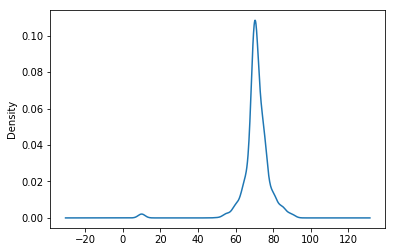

In [5]:
berPercent = bar.percent.apply(lambda x: float(x[:2])) 
berPercent.plot.kde()
type(berPercent)

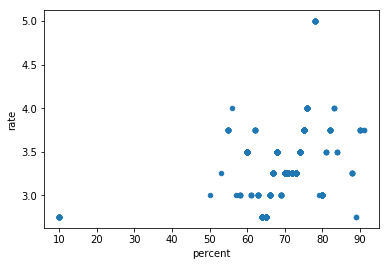

In [6]:
berFrame = pd.Series(index = berPercent, data = bar.rate).to_frame()
berFrame.reset_index(inplace=True)
berFrame.columns = ['percent','rate']
berFrame.plot(kind='scatter', x='percent', y='rate')


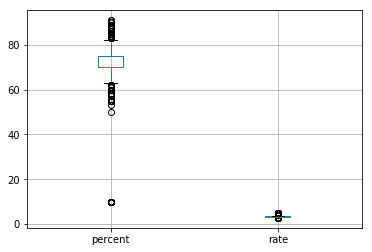

In [7]:
berFrame.boxplot()

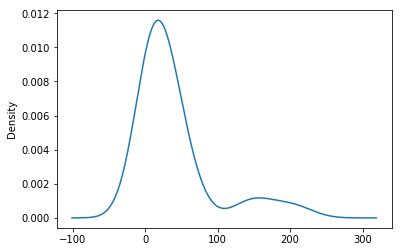

In [8]:
berBeanOrigUnique = bar.bean_orig.value_counts()
maskValue = bar.bean_orig.unique()

berBeanOrigUnique = berBeanOrigUnique.dropna(how = 'any')
berBeanOrigUnique.plot(kind='kde')

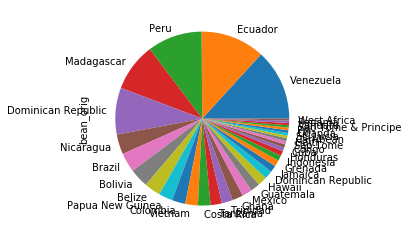

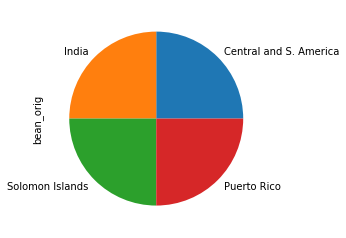

In [9]:
valueCounts = bar.bean_orig.value_counts()

berBeanOrigUnique = valueCounts[valueCounts > 5]
berBeanOrigUnique.plot.pie()
plt.show()

asasas = valueCounts[valueCounts < 5]
asasas.plot.pie()
plt.show()

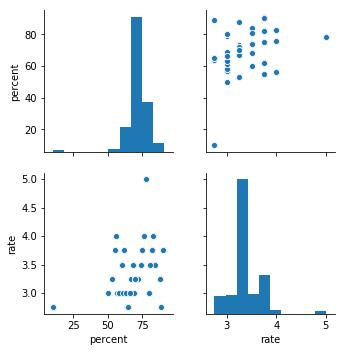

In [13]:
pairplot(berFrame)
plt.show()

In [11]:
# группируем, сортируем
groupedAndSorted = bar.groupby('bean_orig')['rate'].mean().sort_values(ascending=False)
groupedAndSorted.head(10)

# for key, item in groupedAndSorted:
#     group = groupedAndSorted.get_group(key)
#     print(groupedAndSorted.get_group(key), '\n\n')


bean_orig
Solomon Islands           3.437500
Haiti                     3.388889
Honduras                  3.350000
Congo                     3.325000
Guatemala                 3.321429
Vietnam                   3.315789
Papua New Guinea          3.291667
Brazil                    3.284483
Madagascar                3.265517
Central and S. America    3.250000
Name: rate, dtype: float64